In [1]:
from __future__ import print_function, division
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from multiprocessing import  Pool

from platform import python_version

print(python_version())


3.6.8


In [2]:
paper = open("Merged.dat",'r')
lines = paper.readlines()

In [3]:
heading = lines[0].replace("\n","").split("||||")

In [4]:
paper_dict = {}
for key in heading:
    paper_dict[key] = []

In [5]:
for line in lines[1:]:
    content_data = line.replace("\n","").split("||||")
    for index, data in enumerate(content_data):
        paper_dict[heading[index]].append(data)

In [6]:
paper_df = pd.DataFrame.from_dict(paper_dict)

In [7]:
paper_df.head()

,Id,Garbage,og:title,og:site_name,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,twitter:site,citation_date,twitter:title,twitter:description,og:url,category
0,108000,None,Impact of Nuclear Reaction Uncertainties on AG...,arXiv.org,2012/11/21,Impact of Nuclear Reaction Uncertainties on AG...,"Bisterzo, S. || Gallino, R. || Kaeppeler, F. |...",https://arxiv.org/pdf/1211.4970,1211.4970,Asymptotic giant branch (AGB) stars with low i...,@arxiv,2012/11/21,Impact of Nuclear Reaction Uncertainties on AG...,Asymptotic giant branch (AGB) stars with low i...,https://arxiv.org/abs/1211.4970v1,astro-ph
1,108001,None,How to measure diffusional decoherence in mult...,arXiv.org,2014/05/17,How to measure diffusional decoherence in mult...,"Chrapkiewicz, Radoslaw || Wasilewski, Wojciech...",https://arxiv.org/pdf/1304.5396,1304.5396,Diffusion is the main limitation of storage ti...,@arxiv,2013/04/19,How to measure diffusional decoherence in mult...,Diffusion is the main limitation of storage ti...,https://arxiv.org/abs/1304.5396v2,physics
2,108002,None,Habitability of Planets Orbiting Cool Stars,arXiv.org,2010/12/08,Habitability of Planets Orbiting Cool Stars,"Barnes, Rory || Meadows, Victoria S. || Domaga...",https://arxiv.org/pdf/1012.1883,1012.1883,Terrestrial planets are more likely to be dete...,@arxiv,2010/12/08,Habitability of Planets Orbiting Cool Stars,Terrestrial planets are more likely to be dete...,https://arxiv.org/abs/1012.1883v1,astro-ph
3,108003,None,Interacting topological insulators: a review,arXiv.org,2018/10/16,Interacting topological insulators: a review,"Rachel, Stephan",https://arxiv.org/pdf/1804.10656,1804.10656,The discovery of the quantum spin Hall effect ...,@arxiv,2018/04/27,Interacting topological insulators: a review,The discovery of the quantum spin Hall effect ...,https://arxiv.org/abs/1804.10656v3,cond-mat
4,108004,None,Multifractal to monofractal evolution of the L...,arXiv.org,2015/05/08,Multifractal to monofractal evolution of the L...,"Murcio, Roberto || Masucci, A. Paolo || Arcaut...",https://arxiv.org/pdf/1505.02760,1505.02760,We perform a multifractal analysis of the evol...,@arxiv,2015/05/08,Multifractal to monofractal evolution of the L...,We perform a multifractal analysis of the evol...,https://arxiv.org/abs/1505.02760v1,cond-mat


In [8]:
paper_df.drop(["Garbage"], axis= 1, inplace=True)

In [9]:
len(set(paper_df.Id))

264605

In [10]:
paper_df.head()

,Id,og:title,og:site_name,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,twitter:site,citation_date,twitter:title,twitter:description,og:url,category
0,108000,Impact of Nuclear Reaction Uncertainties on AG...,arXiv.org,2012/11/21,Impact of Nuclear Reaction Uncertainties on AG...,"Bisterzo, S. || Gallino, R. || Kaeppeler, F. |...",https://arxiv.org/pdf/1211.4970,1211.4970,Asymptotic giant branch (AGB) stars with low i...,@arxiv,2012/11/21,Impact of Nuclear Reaction Uncertainties on AG...,Asymptotic giant branch (AGB) stars with low i...,https://arxiv.org/abs/1211.4970v1,astro-ph
1,108001,How to measure diffusional decoherence in mult...,arXiv.org,2014/05/17,How to measure diffusional decoherence in mult...,"Chrapkiewicz, Radoslaw || Wasilewski, Wojciech...",https://arxiv.org/pdf/1304.5396,1304.5396,Diffusion is the main limitation of storage ti...,@arxiv,2013/04/19,How to measure diffusional decoherence in mult...,Diffusion is the main limitation of storage ti...,https://arxiv.org/abs/1304.5396v2,physics
2,108002,Habitability of Planets Orbiting Cool Stars,arXiv.org,2010/12/08,Habitability of Planets Orbiting Cool Stars,"Barnes, Rory || Meadows, Victoria S. || Domaga...",https://arxiv.org/pdf/1012.1883,1012.1883,Terrestrial planets are more likely to be dete...,@arxiv,2010/12/08,Habitability of Planets Orbiting Cool Stars,Terrestrial planets are more likely to be dete...,https://arxiv.org/abs/1012.1883v1,astro-ph
3,108003,Interacting topological insulators: a review,arXiv.org,2018/10/16,Interacting topological insulators: a review,"Rachel, Stephan",https://arxiv.org/pdf/1804.10656,1804.10656,The discovery of the quantum spin Hall effect ...,@arxiv,2018/04/27,Interacting topological insulators: a review,The discovery of the quantum spin Hall effect ...,https://arxiv.org/abs/1804.10656v3,cond-mat
4,108004,Multifractal to monofractal evolution of the L...,arXiv.org,2015/05/08,Multifractal to monofractal evolution of the L...,"Murcio, Roberto || Masucci, A. Paolo || Arcaut...",https://arxiv.org/pdf/1505.02760,1505.02760,We perform a multifractal analysis of the evol...,@arxiv,2015/05/08,Multifractal to monofractal evolution of the L...,We perform a multifractal analysis of the evol...,https://arxiv.org/abs/1505.02760v1,cond-mat


In [11]:
paper_df.drop_duplicates(subset="Id",keep = False, inplace = True) 

In [12]:
len(paper_df.Id)

246024

In [13]:
paper_df.drop(["og:site_name"], axis= 1, inplace=True)
paper_df.drop(["twitter:site"], axis= 1, inplace=True)
paper_df.drop(["twitter:title"], axis= 1, inplace=True)
paper_df.drop(["twitter:description"], axis= 1, inplace=True)

In [14]:
paper_df.head()

,Id,og:title,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,citation_date,og:url,category
0,108000,Impact of Nuclear Reaction Uncertainties on AG...,2012/11/21,Impact of Nuclear Reaction Uncertainties on AG...,"Bisterzo, S. || Gallino, R. || Kaeppeler, F. |...",https://arxiv.org/pdf/1211.4970,1211.4970,Asymptotic giant branch (AGB) stars with low i...,2012/11/21,https://arxiv.org/abs/1211.4970v1,astro-ph
1,108001,How to measure diffusional decoherence in mult...,2014/05/17,How to measure diffusional decoherence in mult...,"Chrapkiewicz, Radoslaw || Wasilewski, Wojciech...",https://arxiv.org/pdf/1304.5396,1304.5396,Diffusion is the main limitation of storage ti...,2013/04/19,https://arxiv.org/abs/1304.5396v2,physics
2,108002,Habitability of Planets Orbiting Cool Stars,2010/12/08,Habitability of Planets Orbiting Cool Stars,"Barnes, Rory || Meadows, Victoria S. || Domaga...",https://arxiv.org/pdf/1012.1883,1012.1883,Terrestrial planets are more likely to be dete...,2010/12/08,https://arxiv.org/abs/1012.1883v1,astro-ph
3,108003,Interacting topological insulators: a review,2018/10/16,Interacting topological insulators: a review,"Rachel, Stephan",https://arxiv.org/pdf/1804.10656,1804.10656,The discovery of the quantum spin Hall effect ...,2018/04/27,https://arxiv.org/abs/1804.10656v3,cond-mat
4,108004,Multifractal to monofractal evolution of the L...,2015/05/08,Multifractal to monofractal evolution of the L...,"Murcio, Roberto || Masucci, A. Paolo || Arcaut...",https://arxiv.org/pdf/1505.02760,1505.02760,We perform a multifractal analysis of the evol...,2015/05/08,https://arxiv.org/abs/1505.02760v1,cond-mat


In [15]:
def get_category(string_data):
    splitted = string_data.split("/")
    if len(splitted) == 1:
        return None
    else:
        return splitted[0]

paper_df["edited_category"] = paper_df[paper_df["category"] == "None"]["citation_arxiv_id"].map(get_category)

In [16]:
paper_df.head()

,Id,og:title,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,citation_date,og:url,category,edited_category
0,108000,Impact of Nuclear Reaction Uncertainties on AG...,2012/11/21,Impact of Nuclear Reaction Uncertainties on AG...,"Bisterzo, S. || Gallino, R. || Kaeppeler, F. |...",https://arxiv.org/pdf/1211.4970,1211.4970,Asymptotic giant branch (AGB) stars with low i...,2012/11/21,https://arxiv.org/abs/1211.4970v1,astro-ph,NaN
1,108001,How to measure diffusional decoherence in mult...,2014/05/17,How to measure diffusional decoherence in mult...,"Chrapkiewicz, Radoslaw || Wasilewski, Wojciech...",https://arxiv.org/pdf/1304.5396,1304.5396,Diffusion is the main limitation of storage ti...,2013/04/19,https://arxiv.org/abs/1304.5396v2,physics,NaN
2,108002,Habitability of Planets Orbiting Cool Stars,2010/12/08,Habitability of Planets Orbiting Cool Stars,"Barnes, Rory || Meadows, Victoria S. || Domaga...",https://arxiv.org/pdf/1012.1883,1012.1883,Terrestrial planets are more likely to be dete...,2010/12/08,https://arxiv.org/abs/1012.1883v1,astro-ph,NaN
3,108003,Interacting topological insulators: a review,2018/10/16,Interacting topological insulators: a review,"Rachel, Stephan",https://arxiv.org/pdf/1804.10656,1804.10656,The discovery of the quantum spin Hall effect ...,2018/04/27,https://arxiv.org/abs/1804.10656v3,cond-mat,NaN
4,108004,Multifractal to monofractal evolution of the L...,2015/05/08,Multifractal to monofractal evolution of the L...,"Murcio, Roberto || Masucci, A. Paolo || Arcaut...",https://arxiv.org/pdf/1505.02760,1505.02760,We perform a multifractal analysis of the evol...,2015/05/08,https://arxiv.org/abs/1505.02760v1,cond-mat,NaN


In [17]:
paper_df = paper_df.replace(np.nan, 'None', regex=True)

In [18]:
paper_df["category"] = paper_df ["edited_category"] + " " + paper_df["category"] 


In [19]:
paper_df.drop(["edited_category"], axis = 1, inplace = True)
paper_df.head()

,Id,og:title,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,citation_date,og:url,category
0,108000,Impact of Nuclear Reaction Uncertainties on AG...,2012/11/21,Impact of Nuclear Reaction Uncertainties on AG...,"Bisterzo, S. || Gallino, R. || Kaeppeler, F. |...",https://arxiv.org/pdf/1211.4970,1211.4970,Asymptotic giant branch (AGB) stars with low i...,2012/11/21,https://arxiv.org/abs/1211.4970v1,None astro-ph
1,108001,How to measure diffusional decoherence in mult...,2014/05/17,How to measure diffusional decoherence in mult...,"Chrapkiewicz, Radoslaw || Wasilewski, Wojciech...",https://arxiv.org/pdf/1304.5396,1304.5396,Diffusion is the main limitation of storage ti...,2013/04/19,https://arxiv.org/abs/1304.5396v2,None physics
2,108002,Habitability of Planets Orbiting Cool Stars,2010/12/08,Habitability of Planets Orbiting Cool Stars,"Barnes, Rory || Meadows, Victoria S. || Domaga...",https://arxiv.org/pdf/1012.1883,1012.1883,Terrestrial planets are more likely to be dete...,2010/12/08,https://arxiv.org/abs/1012.1883v1,None astro-ph
3,108003,Interacting topological insulators: a review,2018/10/16,Interacting topological insulators: a review,"Rachel, Stephan",https://arxiv.org/pdf/1804.10656,1804.10656,The discovery of the quantum spin Hall effect ...,2018/04/27,https://arxiv.org/abs/1804.10656v3,None cond-mat
4,108004,Multifractal to monofractal evolution of the L...,2015/05/08,Multifractal to monofractal evolution of the L...,"Murcio, Roberto || Masucci, A. Paolo || Arcaut...",https://arxiv.org/pdf/1505.02760,1505.02760,We perform a multifractal analysis of the evol...,2015/05/08,https://arxiv.org/abs/1505.02760v1,None cond-mat


In [20]:
def assign_category(category):
    splited = category.split()
    return splited[0] if splited[0] != "None" else splited[1]
    
paper_df["category"] = paper_df["category"].map(assign_category)

In [21]:
paper_df["category"].unique()

array(['astro-ph', 'physics', 'cond-mat', 'math', 'hep-ph', 'q-bio',
       'None', 'math-ph', 'q-fin', 'nucl-th', 'hep-th', 'hep-ex',
       'solv-int', 'gr-qc', 'cs', 'nucl-ex', 'hep-lat', 'chao-dyn',
       'stat', 'nlin', 'quant-ph', 'eess', 'alg-geom', 'econ', 'dg-ga',
       'q-alg', 'patt-sol', 'funct-an', 'adap-org', 'chem-ph', 'mtrl-th',
       'supr-con', 'comp-gas', 'atom-ph', 'cmp-lg'], dtype=object)

In [22]:
physics_category=["astro-ph",
                  "cond-mat",
                  "gr-qc",
                  "hep-ex",
                  "hep-lat",
                  "hep-ph",
                  "hep-th",
                  "math-ph",
                  "nlin",
                  "nucl-ex",
                  "nucl-th",
                  "physics"
                 ]

In [23]:
total_papers = {}
for phy_category in physics_category:
    total_papers[phy_category] = paper_df[paper_df["category"] == phy_category]["category"].count()


In [24]:
total_papers

{'astro-ph': 44437,
 'cond-mat': 59067,
 'gr-qc': 6948,
 'hep-ex': 6909,
 'hep-lat': 2257,
 'hep-ph': 11588,
 'hep-th': 12868,
 'math-ph': 312,
 'nlin': 2681,
 'nucl-ex': 1701,
 'nucl-th': 2977,
 'physics': 20381}

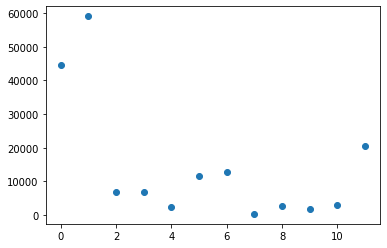

In [25]:
plt.plot(list(total_papers.values()),"o")

In [26]:
total_papers.values()

dict_values([44437, 59067, 6948, 6909, 2257, 11588, 12868, 312, 2681, 1701, 2977, 20381])

In [32]:
import nltk
import re
from nltk.util import ngrams
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re

stop_words = set(stopwords.words("english"))

def get_abstract_words(text_abs, ngram_range = (1,2), list_flag = True):
    try:
        words = {}
        words_freq = {}
        #Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', text_abs)
    
        #Convert to lowercase
        text = text.lower()
    
        #remove tags
        text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
        # remove special characters and digits
        text=re.sub("(\\d|\\W)+"," ",text)
    
        ##Convert to list from string
        text = text.split()
    
        ##Stemming
        ps=PorterStemmer()   
        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in  stop_words] 
        if list_flag:
            ngram_list = []
            ngrams_low = min(ngram_range)
            ngrams_high = max(ngram_range)
            for ngram_tag in range(ngrams_low, ngrams_high+1):
                n_grams_tuple = ngrams(text, ngram_tag)
                n_grams_joined_list = [ ' '.join(grams) for grams in n_grams_tuple]
                ngram_list = ngram_list + n_grams_joined_list
            return ngram_list
            
        else:
            
            text = [" ".join(text)]
            cv=CountVectorizer(max_df=1,stop_words=stop_words, max_features=10000, ngram_range=ngram_range).fit(text)
            bag_of_words=cv.transform(text)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = {word:sum_words[0, idx] for word, idx in cv.vocabulary_.items()}
            
            return words_freq
    except:
        if list_flag:
            return []
        else:
            return {}
        
def get_top_words(freq_dictonary,ngram=1,n=None):
    keys = freq_dictonary.keys()
    selected_keys_values = []
    for key in keys:
        if len(key.split()) == ngram:
            selected_keys_values.append((key,freq_dictonary[key]))
    
    words_freq =sorted(selected_keys_values, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


def plot_word_freq(word_freq_tuple):
    from pandas import DataFrame
    word_freq_df = pandas.DataFrame(word_freq_tuple)
    word_freq_df.columns=["n-gram", "Freq"]

    #Barplot of most freq Tri-grams
    from seaborn import set,barplot
    sns.set(rc={'figure.figsize':(13,8)})
    j=sns.barplot(x="n-gram", y="Freq", data=word_freq_df)
    j.set_xticklabels(j.get_xticklabels(), rotation=45)

def dict_to_list(dictonary):
    output_list = []
    for keys in dictonary:
        output_list = output_list + dictonary[keys] * [keys]
    return output_list

def parallelize_dataframe(df, func, n_cores=16):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

    


def add_abstract(df):
    df["abstract"] = df["og:description"].apply(get_abstract_words)
    return df

def add_abstract_key_list(df):
    df["abstract_key_list"] = df["abstract"].apply(dict_to_list)
    return df    

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hbhattar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hbhattar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
new_paper_df = parallelize_dataframe(paper_df,add_abstract)

In [34]:
def get_year(string):
    split = string.split("/")
    return split[0]

new_paper_df["year"] = new_paper_df["citation_date"].map(get_year)

In [35]:
subPaper_df = pd.DataFrame()

In [36]:
subPaper_df = new_paper_df[["Id","citation_title","year","category","og:description","abstract"]]

In [37]:
condPaper_df = pd.DataFrame()
condPaper_df = subPaper_df[subPaper_df["category"] == "cond-mat"]

In [38]:
#unique years in condPaper
years = condPaper_df["year"].unique()

In [39]:
years

array(['2018', '2015', '2013', '2019', '2012', '2010', '2017', '1995',
       '1998', '2016', '2014', '2011', '1999', '1996', '1997', '1994',
       '1993', '2001', '2008', '1992', '2009', '2003', '2005', '2004',
       '2006', '2007', '2002'], dtype=object)

In [40]:
condPaper_df.head()

,Id,citation_title,year,category,og:description,abstract
3,108003,Interacting topological insulators: a review,2018,cond-mat,The discovery of the quantum spin Hall effect ...,"[discovery, quantum, spin, hall, effect, topol..."
4,108004,Multifractal to monofractal evolution of the L...,2015,cond-mat,We perform a multifractal analysis of the evol...,"[perform, multifractal, analysis, evolution, l..."
10,108010,Crossover from the weak to strong-field behavi...,2013,cond-mat,We investigate the monotonic growth of longitu...,"[investigate, monotonic, growth, longitudinal,..."
14,108014,End-to-End Machine Learning for Experimental P...,2019,cond-mat,We demonstrate a method for training a convolu...,"[demonstrate, method, training, convolutional,..."
19,108019,Application of compressed sensing to the simul...,2012,cond-mat,Compressed sensing is a method that allows a s...,"[compressed, sensing, method, allows, signific..."


In [41]:
condMatter = {}
for year in years:
    condMatter[year] = list(condPaper_df[condPaper_df["year"] == str(year)]["abstract"])

In [42]:
from collections import Counter
import functools
def sum_dict(x,y):
    return dict(Counter(x) + Counter(y))
def sum_list(x,y):
    return x + y

def combined_dictonary(list_dict):
    return(functools.reduce(sum_dict,list_dict))

def combined_list(list_list):
    return(functools.reduce(sum_list,list_list))

In [43]:
combined = []
for key in condMatter.keys():
    combined.append(condMatter[key])

In [44]:
def dictonary_count(list_words):
    keys = list(set(list_words))
    return [{key: list_words.count(key)} for key in keys]
    

In [47]:
large_list = combined_list(combined[0])

In [53]:
%%timeit
dict_list_words = dictonary_count(large_list)

KeyboardInterrupt: 

Process ForkPoolWorker-127:
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/hbhattar/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/hbhattar/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hbhattar/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/hbhattar/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/hbhattar/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/hbhattar/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/hbhattar/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)


In [66]:
dict_list_words = get_dict_words(large_list,10)

TypeError: unhashable type: 'list'

In [65]:
def get_dict_words(list_words,nprocs):
    
    from multiprocessing import Pool, current_process
    list_set = list(set(list_words))
    
    def count_word_list(word):
        return {word:list_words.count(word)}

    with Pool(processes=nprocs) as pool:
        final_dict_count = pool.map(list_set)
    return final_dict_count
    

In [118]:
def get_list_combined(list_list_words,nprocs):
    
    from multiprocessing import Pool, current_process
    length = len(list_list_words)
    list_set = list(set(list_words))
    
    def count_word_list(word):
        return {word:list_words.count(word)}

    with Pool(processes=nprocs) as pool:
        final_dict_count = pool.appy(count_word_list,list_set)
    return final_dict_count

{'both1': 22, 'both2': 44, 'only_x': 100, 'only_y': 500}

['hemanta', 'hemanta hemanta', 'name', 'name hemanta', 'name hemanta hemanta']

In [85]:
l

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]

In [62]:
import multiprocessing

def worker(num):
    """thread worker function"""
    print ('Worker:', num)
    return

if __name__ == '__main__':
    jobs = []
    for i in range(5):
        p = multiprocessing.Process(target=worker, args=(i,))
        jobs.append(p)
        p.start()

Worker: 0
Worker: 1
Worker: 2
Worker: 3
Worker: 4


In [275]:
small_list= large_list[:1000]
small_list

['discovery',
 'quantum',
 'spin',
 'hall',
 'effect',
 'topological',
 'insulator',
 'decade',
 'ago',
 'revolutionized',
 'modern',
 'condensed',
 'matter',
 'physic',
 'today',
 'field',
 'topological',
 'state',
 'matter',
 'one',
 'active',
 'fruitful',
 'research',
 'area',
 'experimentalists',
 'theorist',
 'physic',
 'topological',
 'insulator',
 'typically',
 'well',
 'described',
 'band',
 'theory',
 'system',
 'non',
 'interacting',
 'fermion',
 'contrast',
 'several',
 'fascinating',
 'effect',
 'condensed',
 'matter',
 'physic',
 'merely',
 'exist',
 'due',
 'electron',
 'electron',
 'interaction',
 'example',
 'include',
 'unconventional',
 'superconductivity',
 'kondo',
 'effect',
 'mott',
 'hubbard',
 'transition',
 'aim',
 'review',
 'article',
 'give',
 'overview',
 'manifold',
 'direction',
 'emerge',
 'topological',
 'bandstructures',
 'correlation',
 'physic',
 'interfere',
 'compete',
 'include',
 'study',
 'stability',
 'topological',
 'bandstructures',
 'correla

In [276]:

def get_dict_words( word , wordList):
    return {word:wordList.count(word)}
    
def check_if_present(word):
    return word in wordList

In [270]:
small_list

['discovery',
 'quantum',
 'spin',
 'hall',
 'effect',
 'topological',
 'insulator',
 'decade',
 'ago',
 'revolutionized',
 'modern',
 'condensed',
 'matter',
 'physic',
 'today',
 'field',
 'topological',
 'state',
 'matter',
 'one',
 'active',
 'fruitful',
 'research',
 'area',
 'experimentalists',
 'theorist',
 'physic',
 'topological',
 'insulator',
 'typically',
 'well',
 'described',
 'band',
 'theory',
 'system',
 'non',
 'interacting',
 'fermion',
 'contrast',
 'several',
 'fascinating',
 'effect',
 'condensed',
 'matter',
 'physic',
 'merely',
 'exist',
 'due',
 'electron',
 'electron',
 'interaction',
 'example',
 'include',
 'unconventional',
 'superconductivity',
 'kondo',
 'effect',
 'mott',
 'hubbard',
 'transition',
 'aim',
 'review',
 'article',
 'give',
 'overview',
 'manifold',
 'direction',
 'emerge',
 'topological',
 'bandstructures',
 'correlation',
 'physic',
 'interfere',
 'compete',
 'include',
 'study',
 'stability',
 'topological',
 'bandstructures',
 'correla

In [277]:
def get_list_combined(list_words):
    list_set = list(set(list_words))
    
    def count_word_list(word):
        return {word:list_words.count(word)}
    
    combined_form = combined_dictonary(list(map(count_word_list,list_set)))
    return combined_form


def get_list_combined_multiprocessing(list_words):
    list_set = [list_words]
   
    def count_word_list(word):
        
        return {word:list_words.count(word)}
    
    combined_form = combined_dictonary(list(map(count_word_list,list_set)))
    return combined_form

In [278]:
def get_dict_words(list_words,nprocs):
    
    from multiprocessing import Pool, current_process

    with Pool(processes=nprocs) as pool:
        final_dict_count = pool.map(get_list_combined_multiprocessing,list_words)
    return combined_dictonary(list(final_dict_count))
    

In [282]:
%%timeit
get_list_combined(large_list)

KeyboardInterrupt: 

In [281]:
%%timeit
get_dict_words(small_list,16)


2.15 s ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [284]:
len(stop_words)

179

True